![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Modelowanie języka</h1>
<h2> 2. <i>Języki</i>  [wykład]</h2> 
<h3> Filip Graliński (2022)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)



## Języki i ich prawa



Jakim rozkładom statystycznym podlegają języki?



### Język naturalny albo „Pan Tadeusz” w liczbach



Przygotujmy najpierw „infrastrukturę” do *segmentacji* tekstu na różnego rodzaju jednostki.
Używać będziemy generatorów.

**Pytanie** Dlaczego generatory zamiast list?



In [1]:
import requests

url = 'https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt'
pan_tadeusz = requests.get(url).content.decode('utf-8')

pan_tadeusz[100:150]

'Księga pierwsza\r\n\r\n\r\n\r\nGospodarstwo\r\n\r\nPowrót pani'

#### Znaki



In [2]:
from itertools import islice

def get_characters(t):
    yield from t

list(islice(get_characters(pan_tadeusz), 100, 150))

['K',
 's',
 'i',
 'ę',
 'g',
 'a',
 ' ',
 'p',
 'i',
 'e',
 'r',
 'w',
 's',
 'z',
 'a',
 '\r',
 '\n',
 '\r',
 '\n',
 '\r',
 '\n',
 '\r',
 '\n',
 'G',
 'o',
 's',
 'p',
 'o',
 'd',
 'a',
 'r',
 's',
 't',
 'w',
 'o',
 '\r',
 '\n',
 '\r',
 '\n',
 'P',
 'o',
 'w',
 'r',
 'ó',
 't',
 ' ',
 'p',
 'a',
 'n',
 'i']

In [3]:
from collections import Counter

c = Counter(get_characters(pan_tadeusz))

c

Counter({'A': 698,
         'd': 11465,
         'a': 30979,
         'm': 10269,
         ' ': 63444,
         'M': 585,
         'i': 29353,
         'c': 14153,
         'k': 12362,
         'e': 25343,
         'w': 14625,
         'z': 22741,
         '\r': 10851,
         '\n': 10851,
         'P': 1265,
         'n': 15505,
         'T': 971,
         'u': 7699,
         's': 15255,
         'y': 13732,
         'l': 6677,
         'o': 23050,
         't': 10757,
         'j': 6586,
         'L': 316,
         'I': 795,
         'S': 1045,
         'B': 567,
         'N': 793,
         '9': 8,
         '7': 2,
         '8': 10,
         '-': 33,
         '3': 3,
         '2': 6,
         '4': 2,
         '5': 2,
         'K': 683,
         'ę': 5534,
         'g': 4775,
         'p': 8031,
         'r': 15328,
         'G': 358,
         'ó': 3097,
         '—': 720,
         ',': 9130,
         'ł': 10059,
         'W': 1258,
         'ż': 3334,
         'ś': 2524,
         'ą

Napiszmy pomocniczą funkcję, która zwraca **listę frekwencyjną**.

Counter({' ': 63444, 'a': 30979, 'i': 29353, 'e': 25343, 'o': 23050, 'z': 22741, 'n': 15505, 'r': 15328, 's': 15255, 'w': 14625, 'c': 14153, 'y': 13732, 'k': 12362, 'd': 11465, '\r': 10851, '\n': 10851, 't': 10757, 'm': 10269, 'ł': 10059, ',': 9130, 'p': 8031, 'u': 7699, 'l': 6677, 'j': 6586, 'b': 5753, 'ę': 5534, 'ą': 4794, 'g': 4775, 'h': 3915, 'ż': 3334, 'ó': 3097, 'ś': 2524, '.': 2380, 'ć': 1956, ';': 1445, 'P': 1265, 'W': 1258, ':': 1152, '!': 1083, 'S': 1045, 'T': 971, 'I': 795, 'N': 793, 'Z': 785, 'J': 729, '—': 720, 'A': 698, 'K': 683, 'ń': 651, 'M': 585, 'B': 567, 'O': 567, 'C': 556, 'D': 552, '«': 540, '»': 538, 'R': 489, '?': 441, 'ź': 414, 'f': 386, 'G': 358, 'L': 316, 'H': 309, 'Ż': 219, 'U': 184, '…': 157, '\*': 150, '(': 76, ')': 76, 'Ś': 71, 'F': 47, 'é': 43, '-': 33, 'Ł': 24, 'E': 23, '/': 19, 'Ó': 13, '8': 10, '9': 8, '2': 6, 'v': 5, 'Ź': 4, '1': 4, '3': 3, 'x': 3, 'V': 3, '7': 2, '4': 2, '5': 2, 'q': 2, 'æ': 2, 'à': 1, 'Ć': 1, '6': 1, '0': 1})



In [4]:
from collections import Counter
from collections import OrderedDict

def freq_list(g, top=None):
  c = Counter(g)

  if top is None:
     items = c.items()
  else:
     items = c.most_common(top)

  return OrderedDict(sorted(items, key=lambda t: -t[1]))

freq_list(get_characters(pan_tadeusz), top=8)

OrderedDict([(' ', 63444),
             ('a', 30979),
             ('i', 29353),
             ('e', 25343),
             ('o', 23050),
             ('z', 22741),
             ('n', 15505),
             ('r', 15328)])

) missing from current font.
  plt.savefig(fname)


'02_Jezyki/pt-chars.png'

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


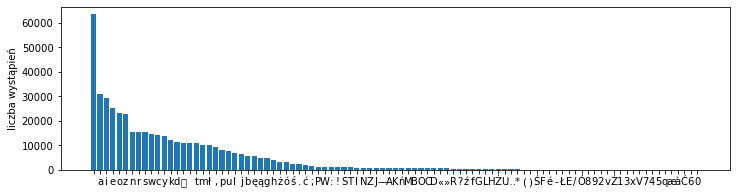

In [5]:
import matplotlib.pyplot as plt
from collections import OrderedDict

def rang_freq_with_labels(name, g, top=None):
   freq = freq_list(g, top)

   plt.figure(figsize=(12, 3))
   plt.ylabel('liczba wystąpień')

   plt.bar(freq.keys(), freq.values())

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_freq_with_labels('pt-chars', get_characters(pan_tadeusz))

#### Słowa



Co rozumiemy pod pojęciem słowa czy wyrazu, nie jest oczywiste. W praktyce zależy to od wyboru **tokenizatora**.

Załóżmy, że przez wyraz rozumieć będziemy nieprzerwany ciąg liter bądź cyfr (oraz gwiazdek
— to za chwilę ułatwi nam analizę pewnego tekstu…).



In [6]:
from itertools import islice
import regex as re

def get_words(t):
  for m in re.finditer(r'[\p{L}0-9\*]+', t):
     yield m.group(0)

list(islice(get_words(pan_tadeusz), 100, 130))

['Ty',
 'co',
 'gród',
 'zamkowy',
 'Nowogródzki',
 'ochraniasz',
 'z',
 'jego',
 'wiernym',
 'ludem',
 'Jak',
 'mnie',
 'dziecko',
 'do',
 'zdrowia',
 'powróciłaś',
 'cudem',
 'Gdy',
 'od',
 'płaczącej',
 'matki',
 'pod',
 'Twoją',
 'opiekę',
 'Ofiarowany',
 'martwą',
 'podniosłem',
 'powiekę',
 'I',
 'zaraz']

Zobaczmy 20 najczęstszych wyrazów.



'02_Jezyki/pt-words-20.png'

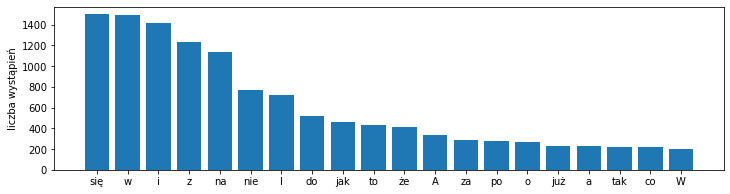

In [7]:
rang_freq_with_labels('pt-words-20', get_words(pan_tadeusz), top=20)

Zobaczmy pełny obraz, już bez etykiet.



'02_Jezyki/pt-words.png'

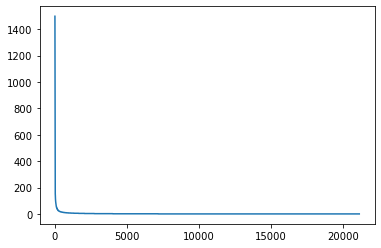

In [8]:
import matplotlib.pyplot as plt
from math import log

def rang_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot(range(1, len(freq.values())+1), freq.values())

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_freq('pt-words', get_words(pan_tadeusz))

Widać, jak różne skale obejmuje ten wykres. Zastosujemy logarytm,
najpierw tylko do współrzędnej $y$.



'02_Jezyki/pt-words-log.png'

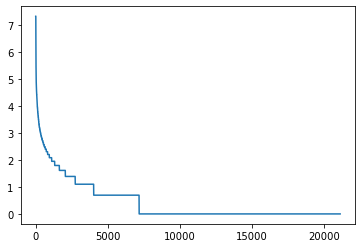

In [9]:
import matplotlib.pyplot as plt
from math import log

def rang_log_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot(range(1, len(freq.values())+1), [log(y) for y in freq.values()])

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_log_freq('pt-words-log', get_words(pan_tadeusz))

****Pytanie**** Dlaczego widzimy coraz dłuższe „schodki”?



#### Hapax legomena



Z poprzedniego wykresu możemy odczytać, że ok. 2/3 wyrazów wystąpiło
dokładnie 1 raz. Słowa występujące jeden raz w danym korpusie noszą
nazwę *hapax legomena* (w liczbie pojedynczej *hapax legomenon*, ἅπαξ
λεγόμενον, „raz powiedziane”, żargonowo: „hapaks”).

„Prawdziwe” hapax legomena, słowa, które wystąpiły tylko raz w *całym*
korpusie tekstów danego języka (np. starożytnego) rzecz jasna
sprawiają olbrzymie trudności w tłumaczeniu. Przykładem jest greckie
słowo ἐπιούσιος, przydawka odnosząca się do chleba w modlitwie „Ojcze
nasz”. Jest to jedyne poświadczenie tego słowa w całym znanym korpusie
greki (nie tylko z Pisma Świętego). W języku polskim tłumaczymy je na
„powszedni”, ale na przykład w rosyjskim przyjął się odpowiednik
„насущный” — o przeciwstawnym do polskiego znaczeniu!

W sumie podobne problemy hapaksy mogą sprawiać metodom statystycznym
przy przetwarzaniu jakiekolwiek korpusu.



#### Wykres log-log



Jeśli wspomniany wcześniej wykres narysujemy używając skali
logarytmicznej dla ****obu**** osi, otrzymamy kształt zbliżony do linii prostej.

Tę własność tekstów nazywamy ****prawem Zipfa****.



'02_Jezyki/pt-words-log-log.png'

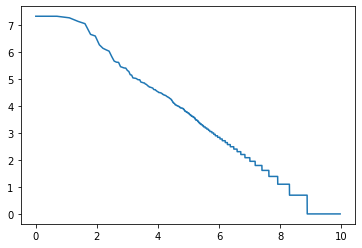

In [10]:
import matplotlib.pyplot as plt
from math import log

def log_rang_log_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot([log(x) for x in range(1, len(freq.values())+1)], [log(y) for y in freq.values()])

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

log_rang_log_freq('pt-words-log-log', get_words(pan_tadeusz))

#### Związek między frekwencją a długością



Powiązane z prawem Zipfa prawo językowe opisuje zależność między
częstością użycia słowa a jego długością. Generalnie im krótsze słowo, tym częstsze.



'02_Jezyki/pt-lengths.png'

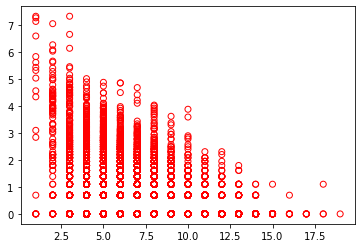

In [11]:
def freq_vs_length(name, g, top=None):
    freq = freq_list(g)

    plt.figure().clear()
    plt.scatter([len(x) for x in freq.keys()], [log(y) for y in freq.values()],
                facecolors='none', edgecolors='r')

    fname = f'02_Jezyki/{name}.png'

    plt.savefig(fname)

    return fname

freq_vs_length('pt-lengths', get_words(pan_tadeusz))

### N-gramy



W modelowaniu języka często rozpatruje się n-gramy, czyli podciągi o
rozmiarze $n$.

Na przykład *digramy* (*bigramy*) to zbitki dwóch jednostek, np. liter albo wyrazów.

| $n$|$n$-gram|nazwa|
|---|---|---|
| 1|1-gram|unigram|
| 2|2-gram|digram/bigram|
| 3|3-gram|trigram|
| 4|4-gram|tetragram|
| 5|5-gram|pentagram|

**Pytanie:** Jak nazywa się 6-gram?

Jak widać, dla symetrii mówimy czasami o unigramach, jeśli operujemy
po prostu na jednostkach, nie na ich podciągach.



#### N-gramy z Pana Tadeusza



Statystyki, które policzyliśmy dla pojedynczych liter czy wyrazów, możemy powtórzyć dla n-gramów.



In [12]:
def ngrams(iter, size):
  ngram = []
  for item in iter:
     ngram.append(item)
     if len(ngram) == size:
        yield tuple(ngram)
        ngram = ngram[1:]

list(ngrams("kotek", 3))

[('k', 'o', 't'), ('o', 't', 'e'), ('t', 'e', 'k')]

Zauważmy, że policzyliśmy wszystkie n-gramy, również częściowo pokrywające się.

Zawsze powinniśmy się upewnić, czy jest jasne, czy chodzi o n-gramy znakowe czy wyrazowe



#### 3-gramy znakowe



'02_Jezyki/pt-3-char-ngrams-log-log.png'

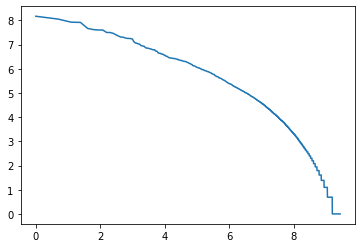

In [13]:
log_rang_log_freq('pt-3-char-ngrams-log-log', ngrams(get_characters(pan_tadeusz), 3))

#### 2-gramy wyrazowe



'02_Jezyki/pt-2-word-ngrams-log-log.png'

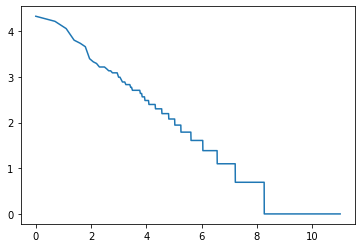

In [14]:
log_rang_log_freq('pt-2-word-ngrams-log-log', ngrams(get_words(pan_tadeusz), 2))

### Tajemniczy język Manuskryptu Wojnicza



[Manuskrypt Wojnicza](https://pl.wikipedia.org/wiki/Manuskrypt_Wojnicza) to powstały w XV w. manuskrypt spisany w
tajemniczym alfabecie, do dzisiaj nieodszyfrowanym. Rękopis stanowi
jedną z największych zagadek historii (i lingwistyki).

![Źródło: Wikipedia Commons](./02_Jezyki/voynich135.jpg)

Sami zbadajmy statystyczne własności tekstu manuskryptu. Użyjmy
transkrypcji Vnow, gdzie poszczególne znaki tajemniczego alfabetu
zamienione na litery alfabetu łacińskiego, cyfry i gwiazdkę. Jak
transkrybować manuskrypt, pozostaje sprawą dyskusyjną, natomiast wybór
takiego czy innego systemu transkrypcji nie powinien wpływać
dramatycznie na analizę statystyczną.



In [15]:
import requests

voynich_url = 'http://www.voynich.net/reeds/gillogly/voynich.now'
voynich = requests.get(voynich_url).content.decode('utf-8')

voynich = re.sub(r'\{[^\}]+\}|^<[^>]+>|[-# ]+', '', voynich, flags=re.MULTILINE)

voynich = voynich.replace('\n\n', '#')
voynich = voynich.replace('\n', ' ')
voynich = voynich.replace('#', '\n')

voynich = voynich.replace('.', ' ')

voynich[100:150]

'9 OR 9FAM ZO8 QOAR9 Q*R 8ARAM 29 [O82*]OM OPCC9 OP'

/tmp/ipykernel_8747/6903746.py:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(fname)


'02_Jezyki/voy-chars.png'

/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


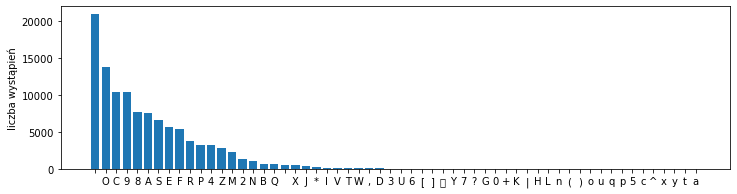

In [16]:
rang_freq_with_labels('voy-chars', get_characters(voynich))

'02_Jezyki/voy-log-log.png'

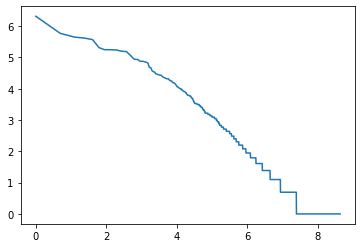

In [17]:
log_rang_log_freq('voy-log-log', get_words(voynich))

'02_Jezyki/voy-words-20.png'

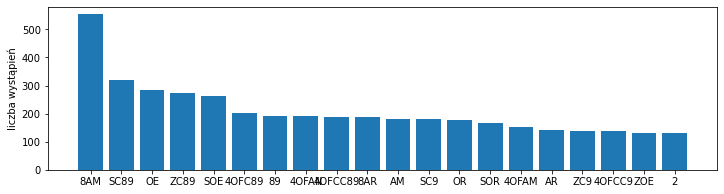

In [18]:
rang_freq_with_labels('voy-words-20', get_words(voynich), top=20)

'02_Jezyki/voy-words-log-log.png'

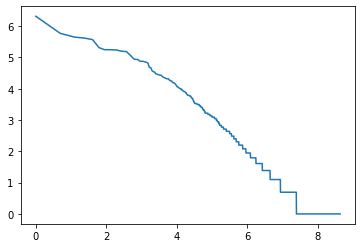

In [19]:
log_rang_log_freq('voy-words-log-log', get_words(voynich))

### Język DNA



Kod genetyczny przejawia własności zaskakująco podobne do języków naturalnych.
Przede wszystkim ma charakter dyskretny, genotyp to ciąg symboli ze skończonego alfabetu.
Podstawowe litery są tylko cztery, reprezentują one nukleotydy, z których zbudowana jest nić DNA:
a, g, c, t.



In [20]:
import requests

dna_url = 'https://raw.githubusercontent.com/egreen18/NanO_GEM/master/rawGenome.txt'
dna = requests.get(dna_url).content.decode('utf-8')

dna = ''.join(dna.split('\n')[1:])
dna = dna.replace('N', 'A')

dna[0:100]

'TATAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTA'

'02_Jezyki/dna-chars.png'

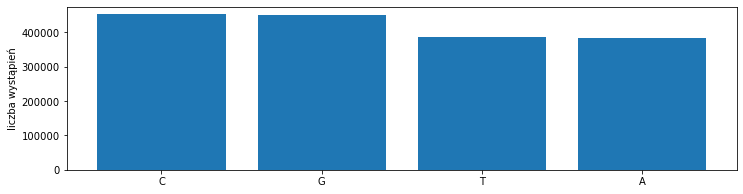

In [21]:
rang_freq_with_labels('dna-chars', get_characters(dna))

#### Tryplety — znaczące cząstki genotypu



Nukleotydy rzeczywiście są jak litery, same w sobie nie niosą
znaczenia. Dopiero ciągi trzech nukleotydów, *tryplety*, kodują jeden
z dwudziestu aminokwasów.



'02_Jezyki/dna-aminos.png'

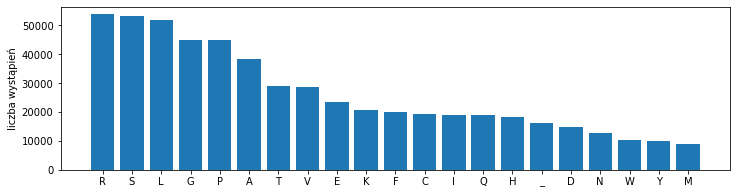

In [22]:
genetic_code = {
     'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
     'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
     'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
     'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
     'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
     'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
     'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
     'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
     'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
     'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
     'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
     'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
     'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
     'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
     'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
     'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
  }

def get_triplets(t):
  for triplet in re.finditer(r'.{3}', t):
    yield genetic_code[triplet.group(0)]

rang_freq_with_labels('dna-aminos', get_triplets(dna))

#### „Zdania” w języku DNA



Z aminokwasów zakodowanych przez tryplet budowane są białka.
Maszyneria budująca białka czyta sekwencję aż do napotkania
trypletu STOP (\_ powyżej). Taka sekwencja to *gen*.



'02_Jezyki/dna_length.png'

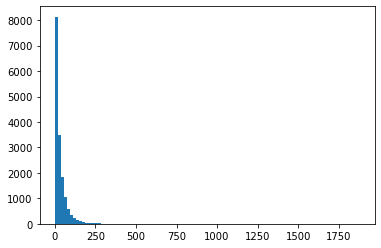

In [23]:
def get_genes(triplets):
  gene = []
  for ammino in triplets:
    if ammino == '_':
       yield gene
       gene = []
    else:
       gene.append(ammino)

plt.figure().clear()
plt.hist([len(g) for g in get_genes(get_triplets(dna))], bins=100)

fname = '02_Jezyki/dna_length.png'

plt.savefig(fname)

fname